# Reading csv dataset file with Pandas

In [1]:
print("It is Saturday")

In [2]:
import pandas as pd

## Upload Data

In [3]:
df = pd.read_csv("us_states_pop2018.csv")

In [4]:
df.head(10)

,Rank,State,2018 Population,2018 Growth,% of US
0,1,California,39776830,0.006075,0.121259
1,2,Texas,28704330,0.014123,0.087505
2,3,Florida,21312211,0.015622,0.064970
3,4,New York,19862512,0.000661,0.060550
4,5,Pennsylvania,12823989,0.001441,0.039094
5,6,Illinois,12768320,-0.002633,0.038924
6,7,Ohio,11694664,0.003093,0.035651
7,8,Georgia,10545138,0.011099,0.032147
8,9,North Carolina,10390149,0.011362,0.031674
9,10,Michigan,9991177,0.002898,0.030458


In [5]:
df.tail()

,Rank,State,2018 Population,2018 Growth,% of US
46,47,North Dakota,755238,-0.000205,0.002302
47,48,Alaska,738068,-0.002334,0.002250
48,49,District of Columbia,703608,0.013885,0.002145
49,50,Vermont,623960,0.000486,0.001902
50,51,Wyoming,573720,-0.009658,0.001749


Why did we only want to display the first 5 rows of the dataframe?

What if we wanted to see the size of this dataframe?

In [6]:
# number of rows
len(df)

51

In [7]:
# shape of df (rows, columns)
df.shape

(51, 5)

## Change Column Name(s)

Why would we want to change the column names?

In [8]:
df = df.rename(columns={'2018 Population': '2018 Pop'})
df.head()

,Rank,State,2018 Pop,2018 Growth,% of US
0,1,California,39776830,0.006075,0.121259
1,2,Texas,28704330,0.014123,0.087505
2,3,Florida,21312211,0.015622,0.064970
3,4,New York,19862512,0.000661,0.060550
4,5,Pennsylvania,12823989,0.001441,0.039094


## Create New Columns

Let's create new columns for the information we extracted from those values.

In [9]:
Pct = [round((people * 100), 2) for people in df["% of US"]]
df["Pct_USA"] = Pct
df.head()

,Rank,State,2018 Pop,2018 Growth,% of US,Pct_USA
0,1,California,39776830,0.006075,0.121259,12.13
1,2,Texas,28704330,0.014123,0.087505,8.75
2,3,Florida,21312211,0.015622,0.064970,6.50
3,4,New York,19862512,0.000661,0.060550,6.06
4,5,Pennsylvania,12823989,0.001441,0.039094,3.91


## Drop Columns

In [10]:
df = df.drop("% of US", axis = 1)
#Check if it dropped
df.head()

,Rank,State,2018 Pop,2018 Growth,Pct_USA
0,1,California,39776830,0.006075,12.13
1,2,Texas,28704330,0.014123,8.75
2,3,Florida,21312211,0.015622,6.50
3,4,New York,19862512,0.000661,6.06
4,5,Pennsylvania,12823989,0.001441,3.91


In [11]:
aa = (df["Pct_USA"].max())
print(aa)

12.13


In [12]:
df.loc[df['State'] == 'Texas']

,Rank,State,2018 Pop,2018 Growth,Pct_USA
1,2,Texas,28704330,0.014123,8.75


In [13]:
array = ['Florida', 'Ohio']
df.loc[df['State'].isin(array)]

,Rank,State,2018 Pop,2018 Growth,Pct_USA
2,3,Florida,21312211,0.015622,6.50
6,7,Ohio,11694664,0.003093,3.57


In [14]:
big_states = df['Pct_USA'] > 8

In [15]:
df[big_states]

,Rank,State,2018 Pop,2018 Growth,Pct_USA
0,1,California,39776830,0.006075,12.13
1,2,Texas,28704330,0.014123,8.75


# Question 1: Can we find states with fastest 2018 growth?

In [16]:
# Your code here

In [17]:
# Matplotlib can take df as parameters

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

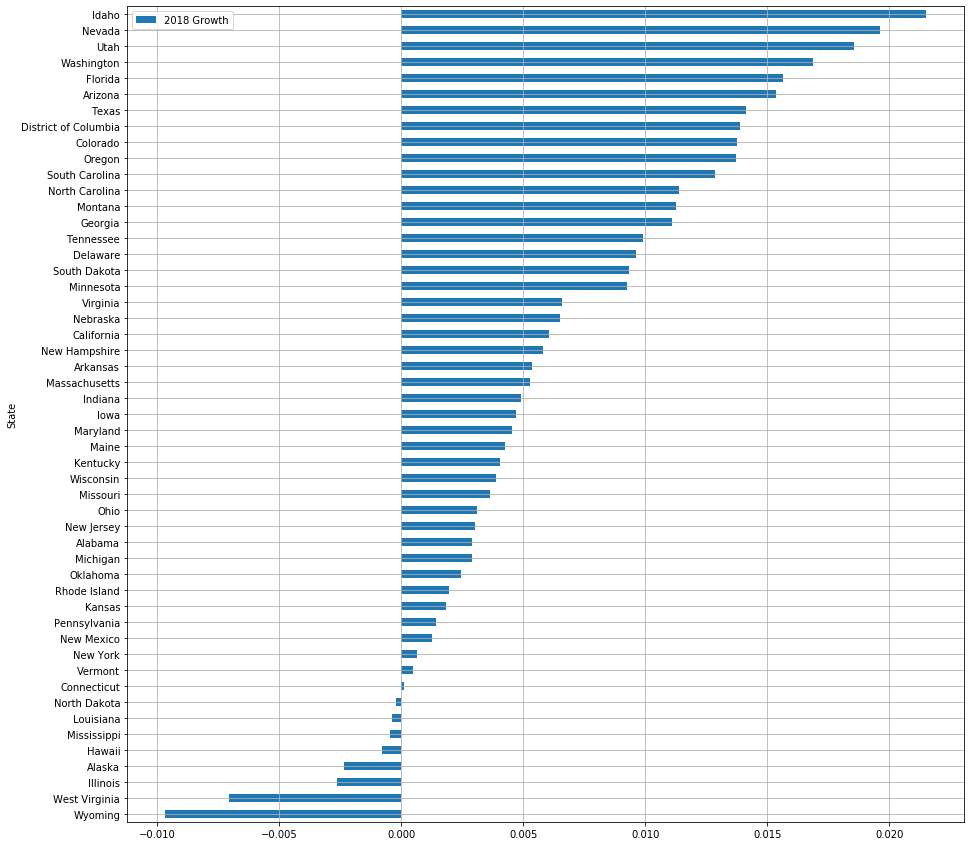

In [19]:
df.sort_values("2018 Growth", axis=0, ascending=True)[["State", "2018 Growth"]] \
    .plot.barh(x="State", y="2018 Growth", figsize=(15,15), grid=True)

In [20]:
# plt.figure(figsize=(15,15)) 
# plt.barh(df["State"],df["2018 Pop"])
# plt.grid(True)
# plt.show()

# Question 2: Plot growth rate on vertical bar chart

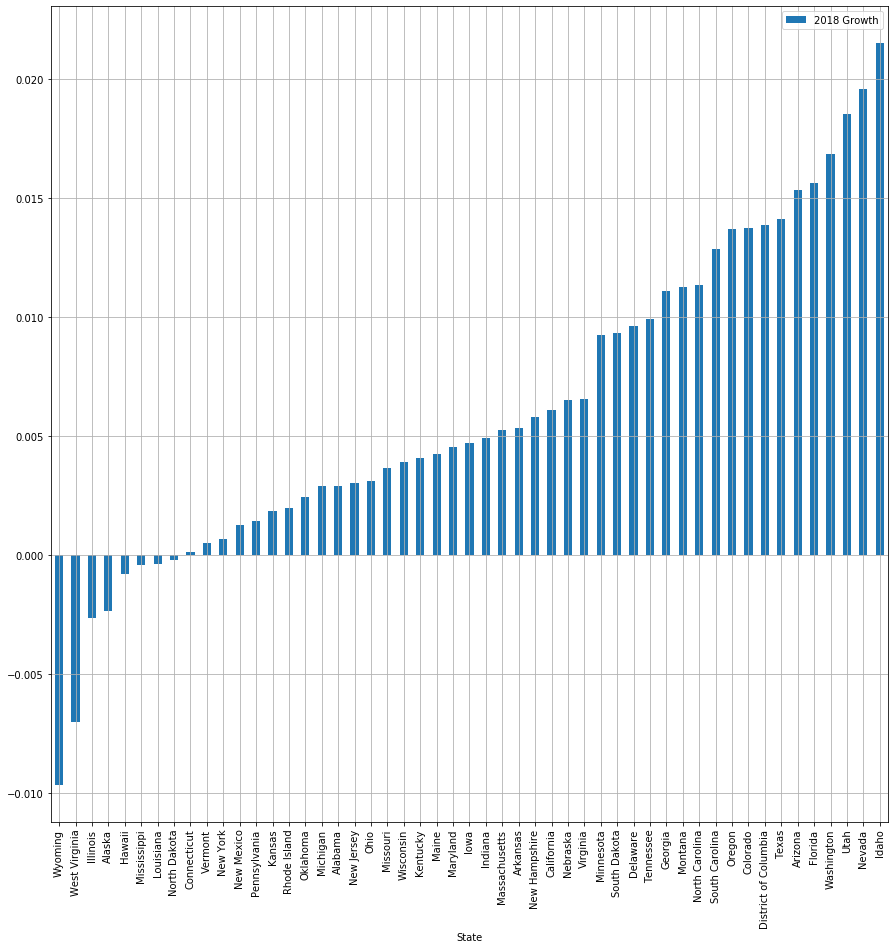

In [21]:
# Your code here ... (x-axis is state name, y-axis is growth rate in percentage)
df.sort_values("2018 Growth", axis=0, ascending=True)[["State", "2018 Growth"]] \
    .plot.bar(x="State", y="2018 Growth", figsize=(15,15), grid=True)


# Pie charts ...

In [22]:
import numpy as np

In [39]:
s = df.sort_values("2018 Growth", axis=0, ascending=True)[["State", "2018 Growth"]]
# ignore the negative growth states to 0
n = [ round(i*100,2) if round(i*100,2) > 0 else 0 for i in s["2018 Growth"].tolist()]
print(n)

[0, 0, 0, 0, 0, 0, 0, 0, 0.01, 0.05, 0.07, 0.13, 0.14, 0.19, 0.2, 0.25, 0.29, 0.29, 0.3, 0.31, 0.37, 0.39, 0.41, 0.42, 0.45, 0.47, 0.49, 0.53, 0.53, 0.58, 0.61, 0.65, 0.66, 0.92, 0.93, 0.96, 0.99, 1.11, 1.13, 1.14, 1.28, 1.37, 1.37, 1.39, 1.41, 1.53, 1.56, 1.69, 1.85, 1.96, 2.15]


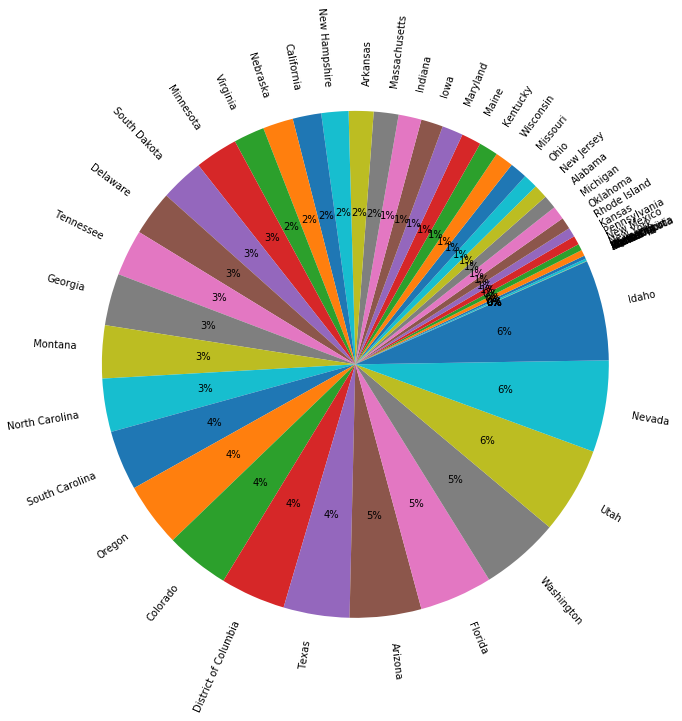

In [43]:
plt.close()
fig, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(n, labels=s["State"], autopct='%1.0f%%', startangle=24, rotatelabels=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [52]:
states = s["State"].to_list()
print(states)

explode = np.zeros(len(states))
explode[states.index("Idaho")] = 0.1

print(explode)

['Wyoming', 'West Virginia', 'Illinois', 'Alaska', 'Hawaii', 'Mississippi', 'Louisiana', 'North Dakota', 'Connecticut', 'Vermont', 'New York', 'New Mexico', 'Pennsylvania', 'Kansas', 'Rhode Island', 'Oklahoma', 'Michigan', 'Alabama', 'New Jersey', 'Ohio', 'Missouri', 'Wisconsin', 'Kentucky', 'Maine', 'Maryland', 'Iowa', 'Indiana', 'Massachusetts', 'Arkansas', 'New Hampshire', 'California', 'Nebraska', 'Virginia', 'Minnesota', 'South Dakota', 'Delaware', 'Tennessee', 'Georgia', 'Montana', 'North Carolina', 'South Carolina', 'Oregon', 'Colorado', 'District of Columbia', 'Texas', 'Arizona', 'Florida', 'Washington', 'Utah', 'Nevada', 'Idaho']
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1]


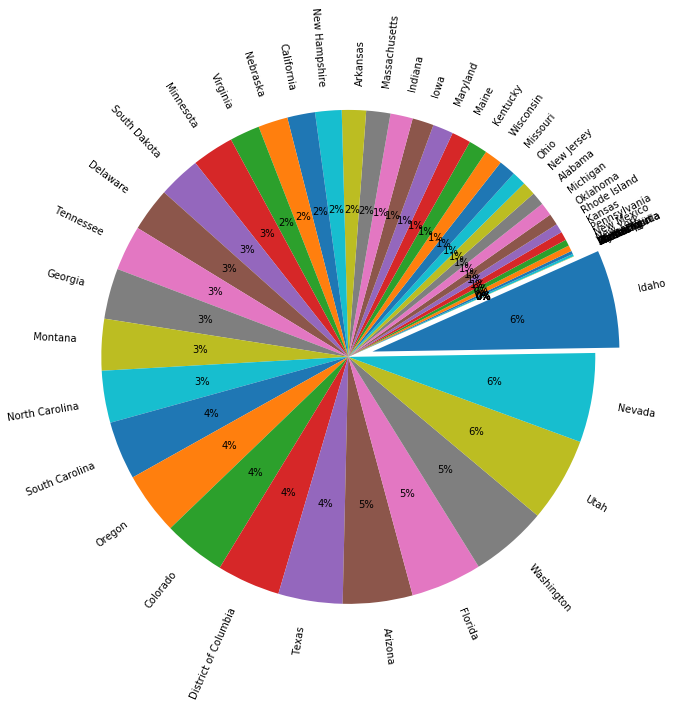

In [53]:
plt.close()
fig, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(n, labels=states, explode=explode, autopct='%1.0f%%', startangle=24, rotatelabels=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Question 3: a) Play with startangle, b) highlight California by using explode to remove the slice.

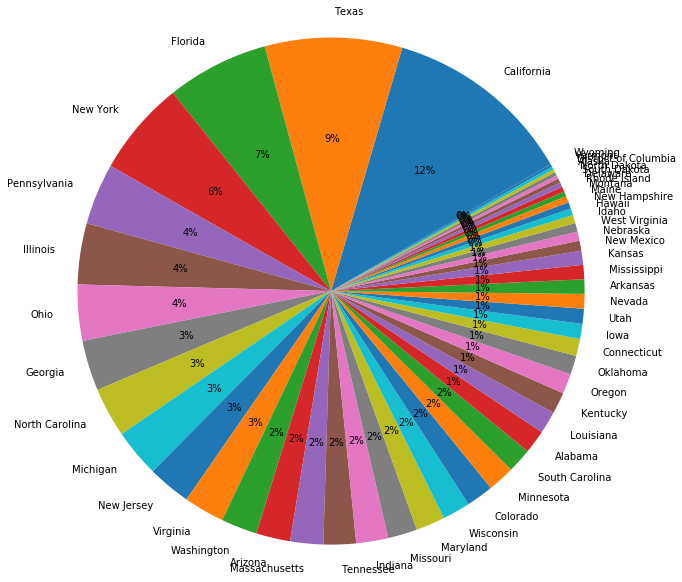

In [54]:
# Pie chart to display all State Population

plt.close()
fig, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(df['Pct_USA'], labels=df['State'], autopct='%1.0f%%', startangle=30)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [55]:
states = df['State'].to_list()
print(states)

explode = np.zeros(len(states))
explode[states.index("California")] = 0.1
print(explode)

['California', 'Texas', 'Florida', 'New York', 'Pennsylvania', 'Illinois', 'Ohio', 'Georgia', 'North Carolina', 'Michigan', 'New Jersey', 'Virginia', 'Washington', 'Arizona', 'Massachusetts', 'Tennessee', 'Indiana', 'Missouri', 'Maryland', 'Wisconsin', 'Colorado', 'Minnesota', 'South Carolina', 'Alabama', 'Louisiana', 'Kentucky', 'Oregon', 'Oklahoma', 'Connecticut', 'Iowa', 'Utah', 'Nevada', 'Arkansas', 'Mississippi', 'Kansas', 'New Mexico', 'Nebraska', 'West Virginia', 'Idaho', 'Hawaii', 'New Hampshire', 'Maine', 'Montana', 'Rhode Island', 'Delaware', 'South Dakota', 'North Dakota', 'Alaska', 'District of Columbia', 'Vermont', 'Wyoming']
[0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]


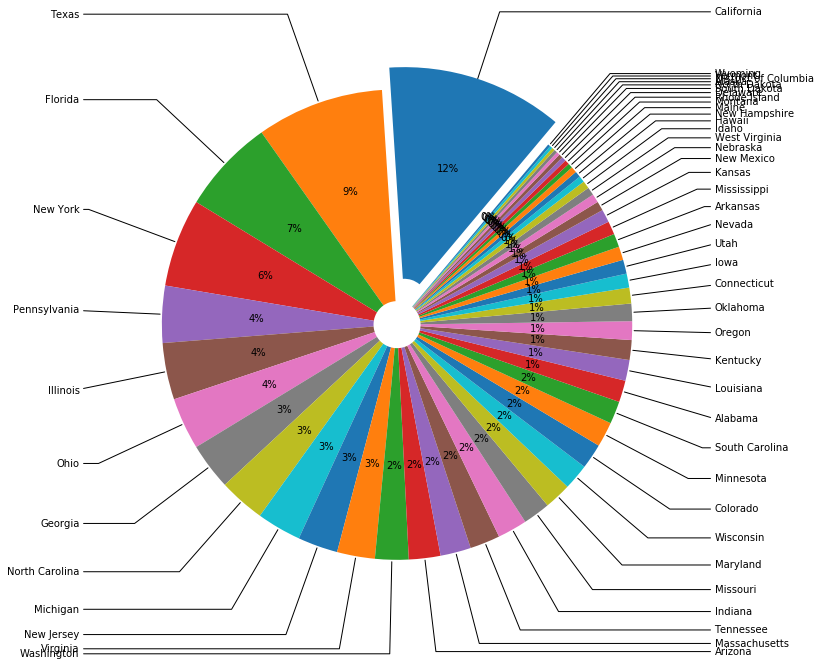

In [59]:
plt.close()

fig, ax1 = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax1.pie(df['Pct_USA'], autopct='%1.0f%%', startangle=50, 
                                   explode=explode,
                                   wedgeprops=dict(width=0.9))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# bbox_props = dict(boxstyle="square, pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
#           bbox=bbox_props, 
          zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(states[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

plt.show()

# Question 4: From the "2018 Pop" column, find the following a) Find total USA population, b) find average, c) find median

In [60]:
# Your code here ...
print("2018 Population Total : {:,}".format(df['2018 Pop'].sum()))
print("2018 Population Average : {:0,.2f}".format(df['2018 Pop'].mean()))
print("2018 Population Median : {:0,.2f}".format(df['2018 Pop'].median()))

2018 Population Total : 328,032,421
2018 Population Average : 6,432,008.25
2018 Population Median : 4,472,265.00


# Question 5: write df to csv file using Pandas. This csv file should have new column Pct_USA.

In [61]:
# Your code here ...
df.to_csv("us_states_pop2018-new.csv", index = None, header=True)
print("DF is saved to csv file.")

DF is saved to csv file.
